In [12]:
import pandas as pd
import yfinance as yf
import datetime as dt
import gspread
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
# Função para baixar os dados financeiros das empresas
def dados_portfolio():
    # Definir o intervalo de datas: de 01/01/2022 até 19/07/2024.
    start = dt.datetime(2022, 1, 1)
    end = dt.datetime(2024, 7, 19)

    # Lista de tickers das empresas
    tickers = ['SBSP3.SA', 'HAPV3.SA', 'COGN3.SA', 'BBDC4.SA', 'AMER3.SA', 'PETR4.SA', 'B3SA3.SA', 'ITUB4.SA', 'TRPL4.SA', 'ABEV3.SA', 'CIEL3.SA', 'CPLE3.SA', 'VALE3.SA', 'MGLU3.SA', 'PCAR3.SA',
'CMIG4.SA', 'BBAS3.SA', 'ITSA4.SA', 'EMBR3.SA', 'BRFS3.SA', 'AZUL4.SA', 'RAIZ4.SA', 'USIM5.SA', 'MRFG3.SA', 'EQTL3.SA', 'CVCB3.SA', 'ASAI3.SA', 'CPLE6.SA', 'CMIN3.SA', 'LREN3.SA',
'ECOR3.SA', 'JBSS3.SA', 'GGBR4.SA', 'MRVE3.SA', 'ANIM3.SA', 'CSAN3.SA', 'VAMO3.SA', 'RADL3.SA', 'CSNA3.SA', 'NTCO3.SA', 'PETZ3.SA', 'SUZB3.SA', 'RENT3.SA', 'ELET3.SA', 'HYPE3.SA',
'LWSA3.SA', 'CYRE3.SA', 'CCRO3.SA', 'BBDC3.SA', 'PETR3.SA', 'JFEN3.SA', 'ENEV3.SA', 'CRFB3.SA', 'RAIL3.SA', 'GOLL4.SA', 'MOVI3.SA', 'HBSA3.SA', 'AESB3.SA', 'UGPA3.SA', 'BHIA3.SA',
'DXCO3.SA', 'STBP3.SA', 'AMBP3.SA', 'WEGE3.SA', 'MULT3.SA', 'IFCM3.SA', 'PRIO3.SA', 'BEEF3.SA', 'POMO4.SA', 'GOAU4.SA', 'RDOR3.SA', 'VBBR3.SA', 'CBAV3.SA', 'MLAS3.SA', 'ALOS3.SA',
'TIMS3.SA', 'QUAL3.SA', 'FLRY3.SA', 'TOTS3.SA', 'CSMG3.SA', 'SOMA3.SA', 'ALPA4.SA', 'SIMH3.SA', 'JHSF3.SA', 'AZEV4.SA', 'BBSE3.SA', 'AURE3.SA', 'EZTC3.SA', 'VIVT3.SA', 'GMAT3.SA',
'GFSA3.SA', 'BRKM5.SA', 'RRRP3.SA', 'RECV3.SA', 'BRAP4.SA', 'VVEO3.SA', 'SMFT3.SA', 'CXSE3.SA', 'GUAR3.SA', 'CEAB3.SA', 'YDUQ3.SA', 'RAPT4.SA', 'SMTO3.SA', 'CPFE3.SA', 'LJQQ3.SA',
'IRBR3.SA', 'VIVA3.SA', 'ONCO3.SA', 'OIBR3.SA', 'NGRD3.SA', 'DASA3.SA', 'TEND3.SA', 'SLCE3.SA', 'BPAN4.SA', 'EGIE3.SA', 'POSI3.SA', 'CURY3.SA', 'GGPS3.SA', 'SRNA3.SA', 'KEPL3.SA',
'DIRR3.SA', 'TRAD3.SA', 'PDGR3.SA', 'MDIA3.SA', 'SBFG3.SA', 'ARML3.SA', 'LIGT3.SA', 'NEOE3.SA', 'PSSA3.SA', 'CLSA3.SA', 'KLBN4.SA', 'CASH3.SA', 'SAPR4.SA', 'ARZZ3.SA', 'TTEN3.SA',
'INTB3.SA', 'MTRE3.SA', 'ABCB4.SA', 'BRSR6.SA', 'PGMN3.SA', 'MYPK3.SA', 'ENAT3.SA', 'ELET6.SA', 'PLPL3.SA', 'BMGB4.SA', 'ENJU3.SA', 'MILS3.SA', 'TGMA3.SA', 'ODPV3.SA', 'MATD3.SA',
'AZEV3.SA', 'MBLY3.SA', 'SOJA3.SA', 'VLID3.SA', 'FIQE3.SA', 'EVEN3.SA', 'PNVL3.SA', 'RCSL4.SA', 'GRND3.SA', 'RANI3.SA', 'FESA4.SA', 'MDNE3.SA', 'TFCO4.SA', 'ORVR3.SA', 'TUPY3.SA',
'TAEE4.SA', 'SEER3.SA', 'ITUB3.SA', 'ESPA3.SA', 'WIZC3.SA', 'VITT3.SA', 'LAVV3.SA', 'AMAR3.SA', 'FRAS3.SA', 'OPCT3.SA', 'KRSA3.SA', 'MEAL3.SA', 'ALPK3.SA', 'JALL3.SA', 'PORT3.SA',
'VULC3.SA', 'HBRE3.SA', 'SEQL3.SA', 'JSLG3.SA', 'ZAMP3.SA', 'KLBN3.SA', 'HBOR3.SA', 'CAML3.SA', 'TASA4.SA', 'CSED3.SA', 'BRIT3.SA', 'TRIS3.SA', 'USIM3.SA', 'BMOB3.SA', 'AGXY3.SA',
'AERI3.SA', 'SAPR3.SA', 'TAEE3.SA', 'PTBL3.SA', 'LEVE3.SA', 'SYNE3.SA', 'SHUL4.SA', 'ETER3.SA', 'ROMI3.SA', 'LOGG3.SA', 'MELK3.SA', 'TECN3.SA', 'PFRM3.SA', 'AGRO3.SA', 'DESK3.SA',
'SANB3.SA', 'RNEW4.SA', 'PRNR3.SA', 'PINE4.SA', 'SANB4.SA', 'RCSL3.SA', 'CMIG3.SA', 'SHOW3.SA', 'LPSB3.SA', 'POMO3.SA', 'ITSA3.SA', 'GOLL11.SA', 'DEXP3.SA', 'PMAM3.SA', 'BLAU3.SA',
'LUPA3.SA', 'UNIP6.SA', 'RAPT3.SA', 'WEST3.SA', 'TCSA3.SA', 'ALLD3.SA', 'DMVF3.SA', 'PDTC3.SA', 'CTSA4.SA', 'VTRU3.SA', 'LVTC3.SA', 'BRAP3.SA', 'CAMB3.SA', 'LOGN3.SA', 'RNEW3.SA',
'IGTI3.SA', 'IGTI3.SA', 'ELMD3.SA', 'RPMG3.SA', 'OIBR4.SA', 'VIVR3.SA', 'LAND3.SA', 'CSUD3.SA', 'CTNM4.SA', 'EUCA4.SA', 'BIOM3.SA', 'GGBR3.SA', 'AALR3.SA', 'TPIS3.SA', 'NUTR3.SA',
'INEP3.SA', 'UCAS3.SA', 'RSID3.SA', 'EPAR3.SA', 'GOAU3.SA', 'TASA3.SA', 'MGEL4.SA', 'SGPS3.SA', 'NINJ3.SA', 'DOTZ3.SA', 'EMAE4.SA', 'BMEB4.SA', 'BPAC5.SA', 'OSXB3.SA', 'COCE5.SA',
'ALUP4.SA', 'TRPL3.SA', 'FHER3.SA', 'ALUP3.SA', 'ENGI4.SA', 'SCAR3.SA', 'ENGI3.SA', 'RDNI3.SA', 'BEES3.SA', 'EALT4.SA', 'INEP4.SA', 'CEBR3.SA', 'ALPA3.SA', 'WHRL4.SA', 'AZEV11.SA',
'HAGA4.SA', 'ATOM3.SA', 'UNIP3.SA', 'BOBR4.SA', 'BRKM3.SA', 'MAPT4.SA', 'BAZA3.SA', 'CEBR6.SA', 'MTSA4.SA', 'TELB4.SA', 'MERC4.SA', 'AVLL3.SA', 'RSUL4.SA', 'HAGA3.SA', 'CRPG5.SA',
'PSVM11.SA', 'REDE3.SA', 'BAHI3.SA', 'CSRN5.SA', 'FESA3.SA', 'BEES4.SA', 'EQPA3.SA', 'CEBR5.SA', 'BRSR3.SA', 'TELB3.SA', 'MNPR3.SA', 'SNSY3.SA', 'ESTR4.SA', 'EKTR4.SA', 'PTNT4.SA',
'GEPA4.SA', 'CGRA4.SA', 'ATMP3.SA', 'WLMM4.SA', 'BMIN4.SA', 'VSTE3.SA', 'CLSC4.SA', 'CEEB3.SA', 'BPAC3.SA', 'CTSA3.SA', 'ENMT4.SA', 'CRPG6.SA', 'DEXP4.SA', 'PTNT3.SA', 'NORD3.SA',
'CGAS5.SA', 'UNIP5.SA', 'BMEB3.SA', 'EQMA3B.SA', 'EUCA3.SA', 'CBEE3.SA', 'WHRL3.SA', 'NEXP3.SA', 'LIPR3.SA', 'MRSA3B.SA', 'CGRA3.SA', 'BGIP4.SA', 'CTKA3.SA', 'OFSA3.SA', 'SNSY5.SA',
'PINE3.SA', 'HOOT4.SA', 'BMKS3.SA', 'DOHL4.SA', 'RPAD5.SA', 'MNDL3.SA', 'CSRN3.SA', 'APER3.SA', 'MRSA5B.SA', 'BSLI4.SA', 'AFLT3.SA', 'MRSA6B.SA', 'PATI3.SA', 'BSLI3.SA', 'CGAS3.SA',
'TKNO4.SA', 'HBTS5.SA', 'CTKA4.SA', 'HETA4.SA', 'TEKA4.SA', 'BAUH4.SA', 'GEPA3.SA', 'BALM4.SA', 'PLAS3.SA', 'CLSC3.SA', 'CEDO4.SA', 'BMIN3.SA', 'BRKM6.SA', 'EALT3.SA', 'IGTI4.SA',
'IGTI4.SA', 'PINE11.SA', 'EQPA6.SA', 'MWET4.SA', 'CTNM3.SA', 'CPLE5.SA', 'LUXM4.SA', 'MAPT3.SA', 'FIEI3.SA', 'BNBR3.SA', 'JOPA3.SA', 'BALM3.SA', 'BDLL4.SA', 'FRIO3.SA', 'ENMT3.SA',
'DMFN3.SA', 'GSHP3.SA', 'RPAD3.SA', 'BGIP3.SA', 'WLMM3.SA', 'BRSR5.SA', 'BDLL3.SA', 'RPAD6.SA', 'EQPA7.SA', 'CALI11.SA', 'DTCY3.SA', 'PEAB3.SA', 'COCE3.SA', 'MOAR3.SA', 'AHEB3.SA',
'CEDO3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento para cada empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker. split é quebra
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
            #vou apagar os erros
            df = df.drop(ticker.split('.')[0], axis=1)

    return df

In [27]:
dados = dados_portfolio()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [28]:
dados.head()

,SBSP3,HAPV3,COGN3,BBDC4,AMER3,PETR4,B3SA3,ITUB4,TRPL4,ABEV3,...,BDLL3,RPAD6,EQPA7,CALI11,DTCY3,PEAB3,COCE3,MOAR3,AHEB3,CEDO3
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,39.950001,10.05,2.39,17.900000,30.850147,29.090000,10.72,21.510000,24.230000,15.33,...,12.0,4.56,6.7,NaN,7.55,57.439999,58.919998,399.00000,27.5,7.19
2022-01-04,38.849998,9.91,2.29,18.000000,29.795952,29.200001,10.95,22.120001,24.260000,15.31,...,12.0,4.57,6.7,NaN,7.55,57.439999,58.919998,399.98999,27.5,7.00
2022-01-05,37.180000,9.36,2.14,17.872726,28.463289,28.070000,10.72,21.700001,23.900000,15.01,...,12.0,4.40,6.7,NaN,7.55,57.439999,58.919998,394.98999,27.5,7.00
2022-01-06,36.209999,9.71,2.09,18.127272,29.099785,28.049999,10.98,22.139999,23.790001,14.77,...,12.0,4.40,6.7,NaN,7.55,57.439999,58.919998,394.00000,27.5,7.00
2022-01-07,35.459999,9.92,2.07,18.390909,27.548326,28.180000,11.24,22.629999,23.660000,14.53,...,12.0,4.17,6.7,NaN,7.55,57.439999,58.919998,395.00000,27.5,7.00


DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2024-07-05', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-15', '2024-07-16',
               '2024-07-17', '2024-07-18'],
              dtype='datetime64[ns]', name='Date', length=636, freq=None)


## Escolha as ações que deseja visuzalizar os dados e coloque ali na lista

## No caso a seguir quero visualizar a evolução das ações do Itaú, da Embraer e da Braskem

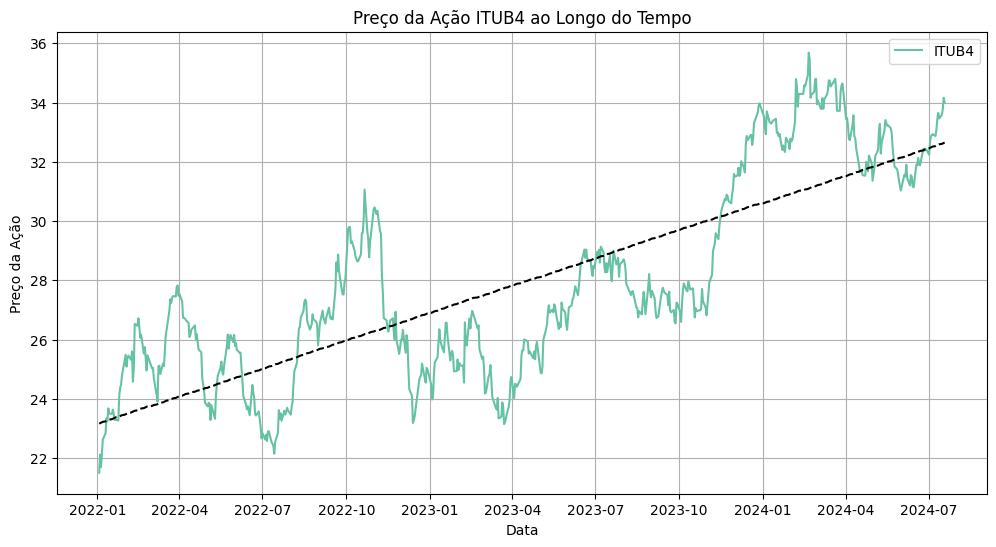

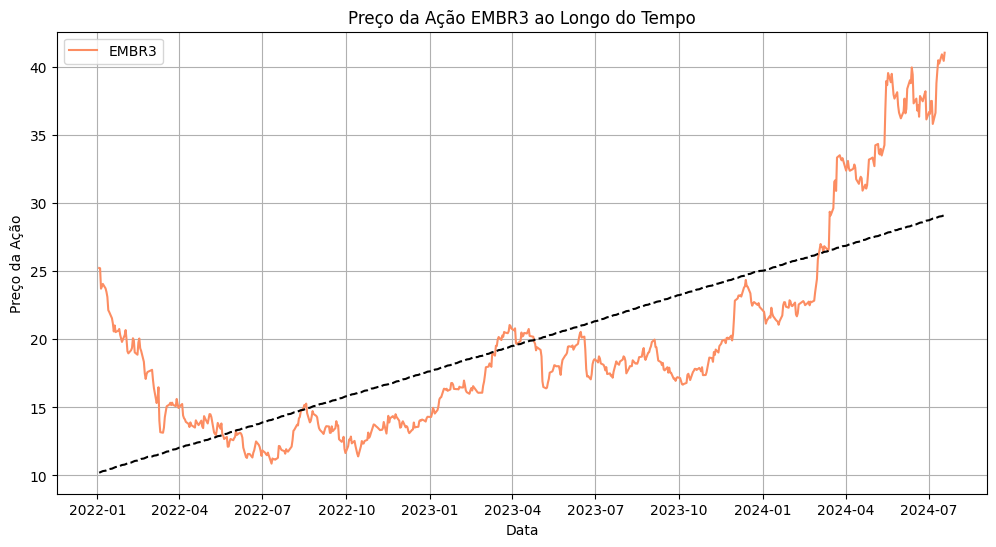

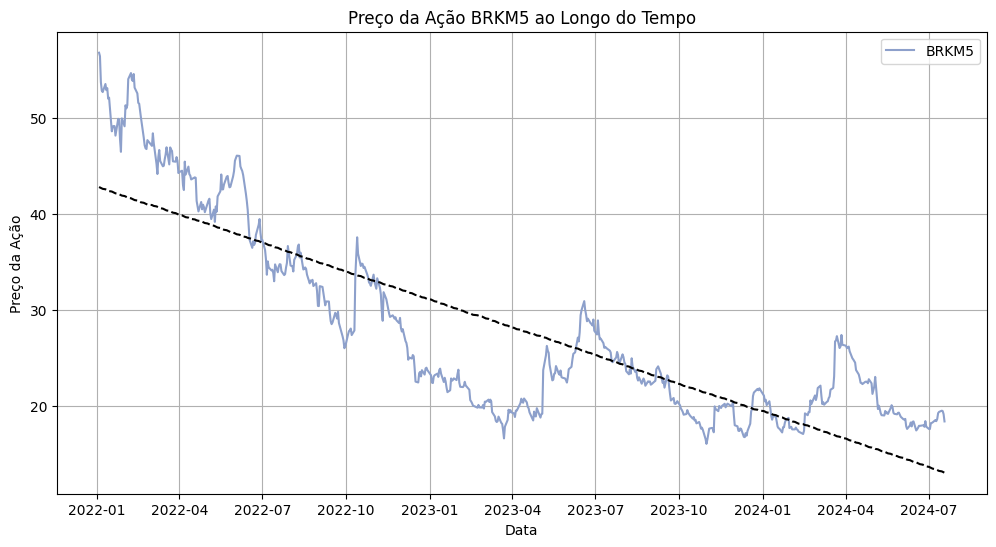

In [39]:
#Escreva os tickers que deseja ver os dados. Exemplo: vou ver os dados do Itaú, da Embraer e da Braskem:
empresas = ['ITUB4', 'EMBR3', 'BRKM5']

#vou criar uma lista de 50 cores aleatórias
cores = sns.color_palette('Set2', len(empresas))


# Plotar um gráfico de linha para cada coluna da planilha
for i, empresa in enumerate(empresas):
    plt.figure(figsize=(12, 6))

    # Desenho um gráfico de linhas para cada empresa
    plt.plot(dados.index, dados[empresa], label=empresa, color= cores[i], linewidth = 1.5)

    # Desenho uma linha de tendência para empresa
    coef = np.polyfit(range(len(dados)), dados[empresa], 1)
    tendencia = np.polyval(coef, range(len(dados)))
    plt.plot(dados.index, tendencia, linestyle='--', color='black')

    plt.xlabel('Data')
    plt.ylabel('Preço da Ação')
    plt.title(f'Preço da Ação {empresa} ao Longo do Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()

## Vou fazer um gráfico dinâmico com algumas ações

In [32]:
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets

In [37]:
# Criar uma lista de cores
cores = sns.color_palette('Set2', len(empresas)).as_hex()

# Plotar os dados das ações
fig = go.Figure()

for empresa, cor in zip(empresas, cores):
    fig.add_trace(go.Scatter(x=dados.index, y=dados[empresa], mode='lines', name=empresa, line=dict(color=cor)))

fig.update_layout(
    title='Preços das Ações',
    xaxis_title='Data',
    yaxis_title='Preço',
    xaxis=dict(rangeselector=dict(buttons=list([
        dict(count=1, label="1m", step="month", stepmode="backward"),
        dict(count=6, label="6m", step="month", stepmode="backward"),
        dict(count=1, label="YTD", step="year", stepmode="todate"),
        dict(count=1, label="1y", step="year", stepmode="backward"),
        dict(step="all")
    ])),
    rangeslider=dict(visible=True)),
    legend_title="Empresas"
)

fig.show()

## Se quiser ver os preços de todas as ações basta rodar o código abaixo

In [39]:
empresas1 = []
empresas1 = dados.columns
#vou criar uma lista de 50 cores aleatórias
cores1 = sns.color_palette('Set2', len(empresas1))


# Plotar um gráfico de linha para cada coluna da planilha
for i, empresa in enumerate(empresas1):
    plt.figure(figsize=(12, 6))

    # Desenho um gráfico de linhas para cada empresa
    plt.plot(dados.index, dados[empresa], label=empresa, color=cores1[i])

    plt.xlabel('Data')
    plt.ylabel('Preço da Ação')
    plt.title(f'Preço da Ação {empresa} ao Longo do Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()